In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

In [1]:
# load_aokvqa.py
import os
import json

def load_aokvqa(aokvqa_dir, split, version='v1p0'):
    assert split in ['train', 'val', 'test', 'test_w_ans']
    dataset = json.load(open(
        os.path.join(aokvqa_dir, f"aokvqa_{version}_{split}.json")
    ))
    return dataset

def get_coco_path(split, image_id, coco_dir):
    return os.path.join(coco_dir, f"{split}2017", f"{image_id:012}.jpg")


In [2]:
AOKVQA_DIR="datasets/aokvqa/"
COCO_DIR="datasets/coco/"
aokvqa_dir = f"./aokvqa/{AOKVQA_DIR}"
coco_dir = f"./aokvqa/{COCO_DIR}"


## Train/Val/Test datasets AOKVQA

In [3]:
train_dataset = load_aokvqa(aokvqa_dir, 'train')  # also 'val' or 'test'
val_dataset = load_aokvqa(aokvqa_dir, 'val')
test_dataset = load_aokvqa(aokvqa_dir, 'test')

In [4]:
print(f"Train aokvqa: {len(train_dataset)}")
print(f"Val aokvqa: {len(val_dataset)}")
print(f"Test aokvqa: {len(test_dataset)}")

Train aokvqa: 17056
Val aokvqa: 1145
Test aokvqa: 6702


In [6]:
train_dataset[2]

{'split': 'train',
 'image_id': 312452,
 'question_id': '22oou4R5ejh4Ay9UQG7yGT',
 'question': 'What is the occupation of the person driving?',
 'choices': ['waiter', 'farmer', 'cashier', 'musician'],
 'correct_choice_idx': 1,
 'direct_answers': ['farmer',
  'farmer',
  'bus driver',
  'farmer',
  'shepherd',
  'farmer',
  'bus driver',
  'farmer',
  'farmer',
  'farmer'],
 'difficult_direct_answer': False,
 'rationales': ['The place is full of sheep that shows the person is a farmer.',
  'Farmer is the obvious profession as the picture shows.',
  'With the tractor he is in and the livestock shown it is easy to surmise his profession.']}

## Modality Analysis

- Lexical Diversity + Sentence Length Analysis
- Average Number of Objects Detected Per Image
- Degrees of Freedom, etc

Lexical Analysis:
   Lexical Diversity  Avg Sentence Length  Sentence Length Std
0           0.057378             8.810213             3.044836


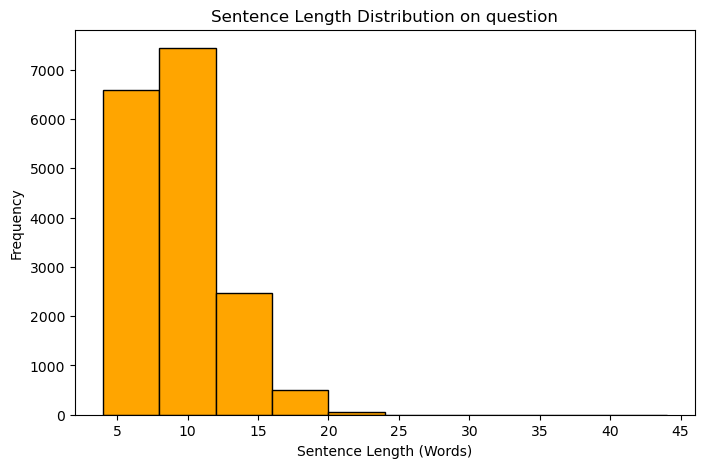

Lexical Analysis:
   Lexical Diversity  Avg Sentence Length  Sentence Length Std
0           0.081141            11.103131             6.755347


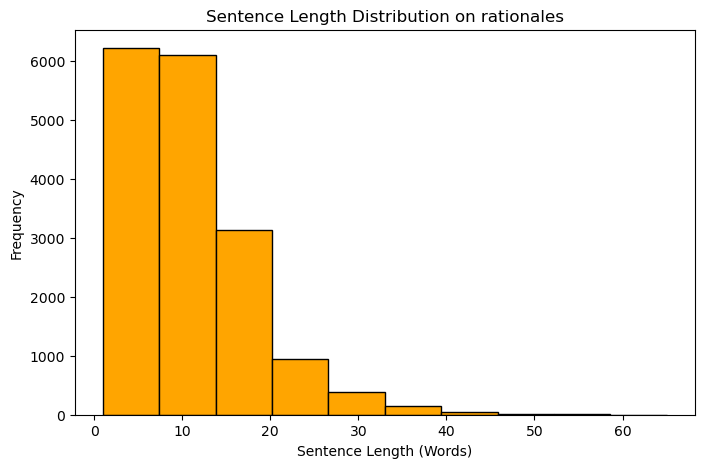

In [20]:
### 1. Lexical Diversity & Sentence Length Analysis ###
def eda_sent_len(dataset=train_dataset, field='question'):
    all_text = []
    sentence_lengths = []

    for entry in dataset:
        if field == 'rationales':
            all_text.extend(entry[field][0].split())
            sentence_lengths.append(len(entry[field][0].split())) 
        else:
            all_text.extend(entry[field].split())
            sentence_lengths.append(len(entry[field].split()))

    # Compute lexical diversity
    unique_words = set(all_text)
    lexical_diversity = len(unique_words) / len(all_text)

    # Compute sentence length statistics
    sentence_length_avg = np.mean(sentence_lengths)
    sentence_length_std = np.std(sentence_lengths)

    # Display lexical statistics
    eda_results = pd.DataFrame({
        "Lexical Diversity": [lexical_diversity],
        "Avg Sentence Length": [sentence_length_avg],
        "Sentence Length Std": [sentence_length_std]
    })
    print("Lexical Analysis:")
    print(eda_results)

    # Plot sentence length distribution
    plt.figure(figsize=(8, 5))
    plt.hist(sentence_lengths, bins=10, edgecolor="black", color="orange")
    plt.xlabel("Sentence Length (Words)")
    plt.ylabel("Frequency")
    plt.title(f"Sentence Length Distribution on {field}")
    plt.show()
eda_sent_len(train_dataset, 'question')
eda_sent_len(train_dataset, 'rationales')